In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [106]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=3):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def R2_func(w, y, A):
    return A/(w**2+y**2)

def Linewidth(w, A, w0, y, c):
    return A/((w**2-w0**2)**2 + w**2*y**2)+c

In [26]:
filename = 'C:/Users/yuhan/Documents/Data/diamond/240521/Mass/Particle 1/NoChargeNoDrive.mat'
filename2 = 'C:/Users/yuhan/Documents/Data/diamond/240521/Mass/Particle 2/NoChargeNoDrive.mat'
filename3 = 'C:/Users/yuhan/Documents/Data/diamond/240521/Mass/Particle 3/NoChargeNoDrive.mat'

In [27]:
data = sio.loadmat(filename)
z = np.transpose(data['D'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDz = scisig.welch(z, fs = 4*10**5, nperseg = 4*10**4, window = 'boxcar')

data = sio.loadmat(filename2)
z = np.transpose(data['D'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDz2 = scisig.welch(z, fs = 4*10**5, nperseg = 4*10**4, window = 'boxcar')

data = sio.loadmat(filename3)
z = np.transpose(data['D'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDz3 = scisig.welch(z, fs = 4*10**5, nperseg = 4*10**4, window = 'boxcar')

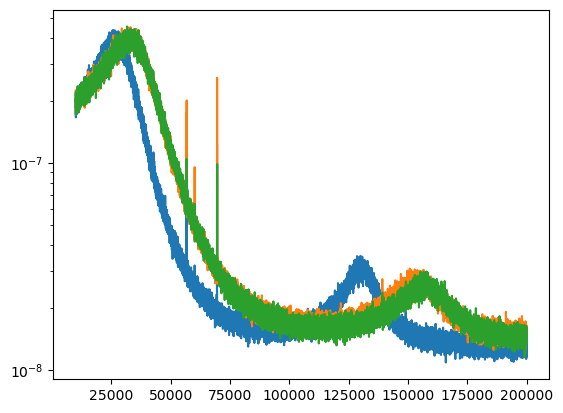

In [28]:
lb = 1000
ub = -1
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.plot(PSDz[0][lb:ub], PSDz2[1][lb:ub])
plt.plot(PSDz[0][lb:ub], PSDz3[1][lb:ub])
plt.yscale('log')

In [100]:
filename = 'C:/Users/yuhan/Documents/Data/diamond/240521/Dipole Measurment/Particle 4/0V/1/1_1.mat'
filename2 = 'C:/Users/yuhan/Documents/Data/diamond/240521/Dipole Measurment/Particle 4/15V/1/1_2.mat'

In [101]:
data = sio.loadmat(filename)
z = np.transpose(data['D'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDz = scisig.welch(z, fs = 4*10**5, nperseg = 4*10**3, window = 'boxcar')

data = sio.loadmat(filename2)
z = np.transpose(data['D'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDz2 = scisig.welch(z, fs = 4*10**5, nperseg = 4*10**3, window = 'boxcar')

In [109]:
lb = 200
ub = 800
fit, cov = opt.curve_fit(Linewidth, PSDz[0][lb:ub], PSDz[1][lb:ub], p0 = [10**(-4), 65000, 4000, 3*10**(-8)])

C:\Users\yuhan\AppData\Local\Temp\ipykernel_17120\3189619661.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  fit, cov = opt.curve_fit(Linewidth, PSDz[0][lb:ub], PSDz[1][lb:ub], p0 = [10**(-4), 65000, 4000, 3*10**(-8)])


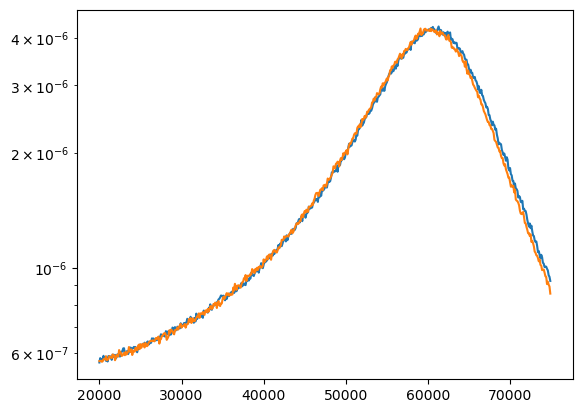

In [107]:
lb = 200
ub = 750
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.plot(PSDz2[0][lb:ub], PSDz2[1][lb:ub])

plt.yscale('log')